In [1]:
# Transferencia de aprendizaje / Transfer learning
# Crear nuestro pripio conjunto de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Crear generador de dataset
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=5, # 
    zoom_range=[0.7, 1.3], # 30% de zoom
    validation_split=0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("dataset", target_size=(224,224), batch_size=32, subset="training", shuffle=True)
data_gen_validacion = datagen.flow_from_directory("dataset", target_size=(224,224), batch_size=32, subset="validation", shuffle=True)


Found 1171 images belonging to 2 classes.
Found 292 images belonging to 2 classes.


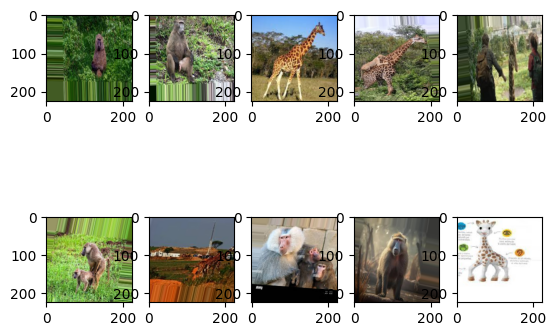

In [2]:
import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(imagenes[i])
    break
plt.show()


In [3]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [4]:
# Importante: congelar la red
mobilenetv2.trainable = False


In [5]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation="softmax")
])

In [6]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [7]:
EPOCAS = 10
entrenamiento = modelo.fit(
    data_gen_entrenamiento,
    epochs=EPOCAS,
    validation_data=data_gen_validacion
)

Epoch 1/10



37/37 [==============================] - 33s 747ms/step - loss: 0.2264 - accuracy: 0.9078 - val_loss: 0.0895 - val_accuracy: 0.9658
Epoch 2/10
37/37 [==============================] - 27s 729ms/step - loss: 0.0916 - accuracy: 0.9675 - val_loss: 0.0758 - val_accuracy: 0.9623
Epoch 3/10
37/37 [==============================] - 27s 726ms/step - loss: 0.0628 - accuracy: 0.9795 - val_loss: 0.0503 - val_accuracy: 0.9795
Epoch 4/10
37/37 [==============================] - 30s 826ms/step - loss: 0.0473 - accuracy: 0.9880 - val_loss: 0.0575 - val_accuracy: 0.9726
Epoch 5/10
37/37 [==============================] - 37s 991ms/step - loss: 0.0409 - accuracy: 0.9898 - val_loss: 0.0447 - val_accuracy: 0.9760
Epoch 6/10
37/37 [==============================] - 35s 961ms/step - loss: 0.0394 - accuracy: 0.9872 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 7/10
37/37 [==============================] - 36s 967ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0277 - val_accuracy: 0.9897
Epoch 8/10

In [31]:
from PIL import Image
import cv2

def categorizar(ruta):
    img = Image.open(ruta)
    img = img.convert("RGB")
    img = np.array(img).astype(float) / 255

    img = cv2.resize(img, (224,224))
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
    return np.argmax(prediccion[0], axis=-1)

In [33]:
ruta = "jirafa.jpg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 0s 46ms/step
1


In [ ]:
ruta = "babuino.jpg"
prediccion = categorizar(ruta)
print(prediccion)